In [2]:
!pip install pandas

You should consider upgrading via the '/home/erick/Documents/FGV/sage-9.2-Ubuntu_20.04-x86_64/SageMath/local/bin/python3 -m pip install --upgrade pip' command.


In [2]:
import numpy as np
import pandas as pd
%display typeset

Calculando dX/dt:

In [3]:
var('X mu D t')
X = function('X')(t)
dxdt = diff(X,t) == mu*X-D*X
dxdt

diff(X(t), t) == -D*X(t) + mu*X(t)

Calculando dS/dt:

In [4]:
var('S mu D Sf X Y t')
S = function('S')(t)
dsdt = diff(S,t) == D*Sf - D*S -(mu*X/Y)
dsdt

diff(S(t), t) == D*Sf - D*S(t) - X*mu/Y

Desenvolvendo a matriz jacobiana:

In [5]:
var('S X mu D Y Sf x s')
J = jacobian([mu*x-D*x, D*Sf - D*s -(mu*x/Y)],[x,s])
J

[-D + mu       0]
[  -mu/Y      -D]

Calculando o traço (p):

In [6]:
J.trace()

-2*D + mu

Calculando o determinante (q):

In [7]:
J.det()

(D - mu)*D

p = -2D+mu

q = D^2 - muD

Δ=p^2-4*q

p^2 = (mu-2D)^2 = mu^2 -4muD +4D^2

4q = 4(D^2 - muD) = 4D^2 - 4muD

Δ = mu^2 -4muD +4D^2 - (4D^2 - 4muD) = mu^2

Autovetores:

In [8]:
J.eigenvectors_right()

[(-D + mu, [(1, -1/Y)], 1), (-D, [(0, 1)], 1)]

Autovalores:

In [9]:
J.eigenvalues()

[-D + mu, -D]

$\lambda_1$: -D

$\lambda_2$: -D+mu

Os autovalores são reais e distintos, já que mu > 0 (mu é taxa de crescimento específica; 1/Tempo): 

Se mu>D, os sinais dos autovalores são opostos ( λ1 <0< λ2 ): Equilíbrio instável em ponto de sela

Se mu<D, os sinais dos autovalores são iguais, nesse caso negativos, já que D é taxa de diluição e portanto não pode ser negativo ( λ1 < λ2 <0): Equilíbrio pontual estável

Se mu=D, um dos autovalores será 0. Nesse caso o modelo ficará constante, como pode ser visto mais adiante no notebook.

Note que mu-D será sempre maior que -D, logo mu-D será o autovalor dominante  (λd)

Polinômio característico:

In [10]:
J.characteristic_polynomial()

x^2 + (2*D - mu)*x + D^2 - D*mu

In [11]:
J.characteristic_polynomial().roots()

[(-D + mu, 1), (-D, 1)]

In [12]:
J.jordan_form()

[-D + mu|      0]
[-------+-------]
[      0|     -D]

Calculando os equilíbrios do sistema:

In [13]:
var("X Y S mu_max K_s D S_f")

sol = solve([(mu_max*S/(K_s+S))*X-D*X, D*S_f-D*S-((mu_max*S/(K_s+S))*X/Y)], [X,S], ics=[0.05,10,0], ivar=t)
sol

[[X == 0, S == -K_s], [X == 0, S == S_f], [X == -(S_f*Y*mu_max - (D*K_s + D*S_f)*Y)/(D - mu_max), S == -D*K_s/(D - mu_max)]]

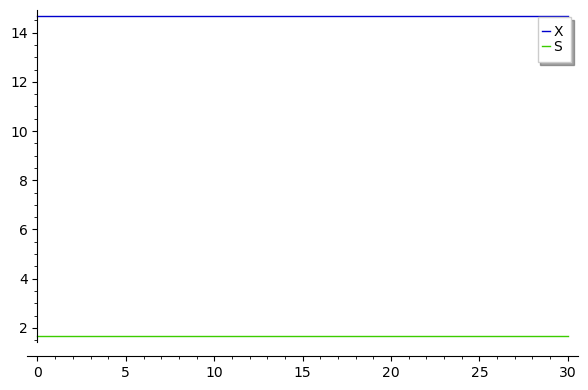

In [34]:
solX, solS = sol[2][0].rhs(), sol[2][1].rhs()
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

Desenvolvendo a matriz jacobiana:

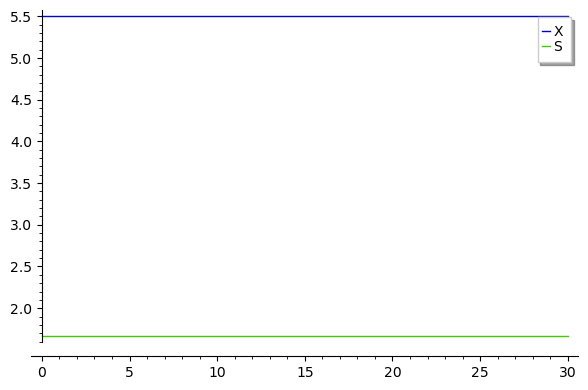

In [35]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0),solS(mu_max = 1.6,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

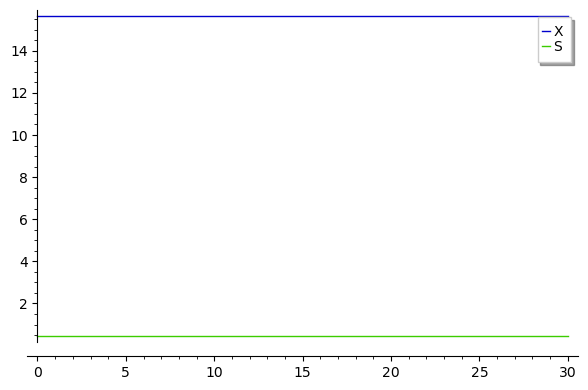

In [36]:
plot((solX(mu_max = 3.2,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0),solS(mu_max = 3.2,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

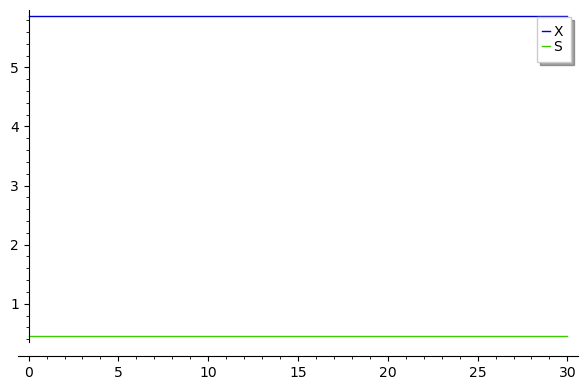

In [37]:
plot((solX(mu_max = 3.2,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0),solS(mu_max = 3.2,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

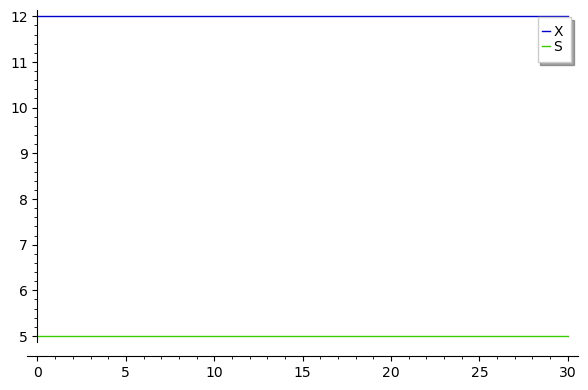

In [38]:
plot((solX(mu_max = 1.2,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0),solS(mu_max = 1.2,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

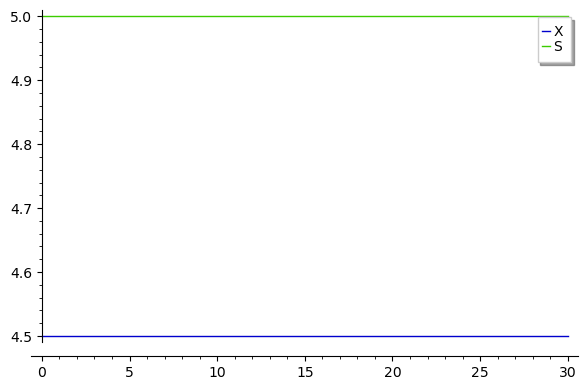

In [39]:
plot((solX(mu_max = 1.2,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0),solS(mu_max = 1.2,K_s = 1.0,Y = 0.3,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

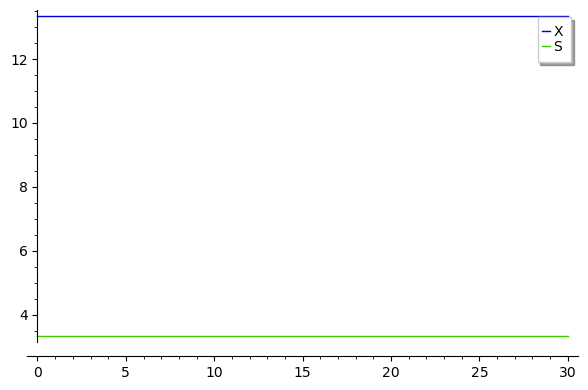

In [40]:
plot((solX(mu_max = 1.6,K_s = 2.0,Y = 0.8,S_f = 20.0,D = 1.0),solS(mu_max = 1.6,K_s = 2.0,Y = 0.8,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

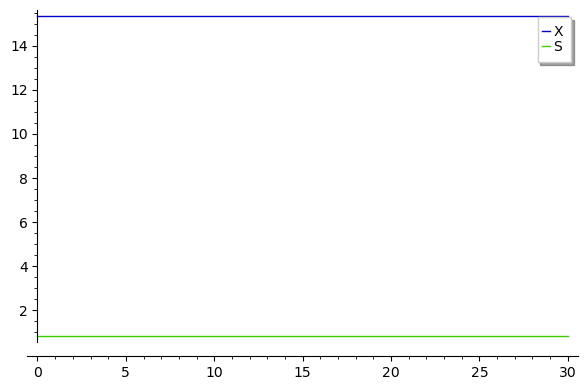

In [41]:
plot((solX(mu_max = 1.6,K_s = 0.5,Y = 0.8,S_f = 20.0,D = 1.0),solS(mu_max = 1.6,K_s = 0.5,Y = 0.8,S_f = 20.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

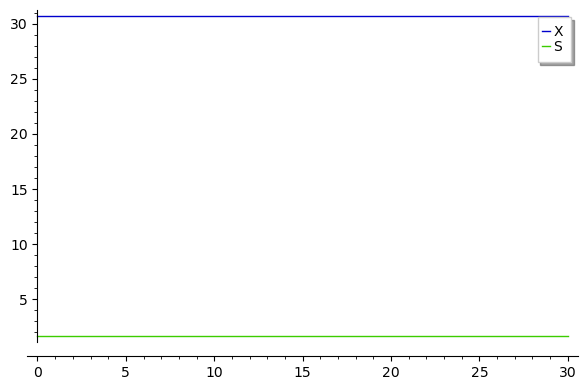

In [42]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 40.0,D = 1.0),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 40.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

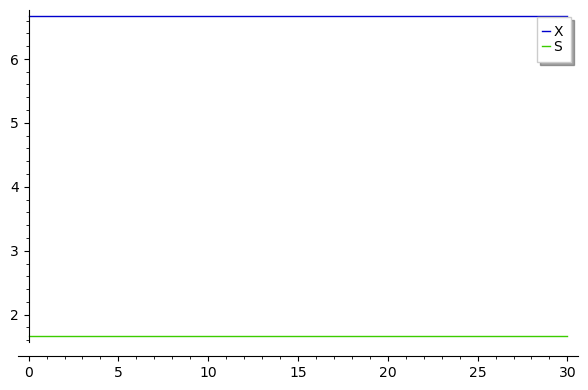

In [43]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 10.0,D = 1.0),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 10.0,D = 1.0)),(t,0,30), legend_label =["X","S"])

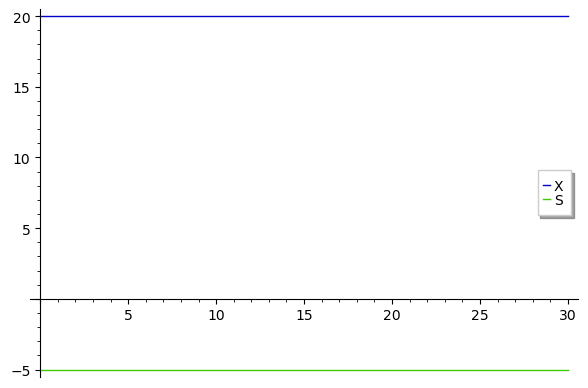

In [44]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 2.0),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 2.0)),(t,0,30), legend_label =["X","S"])

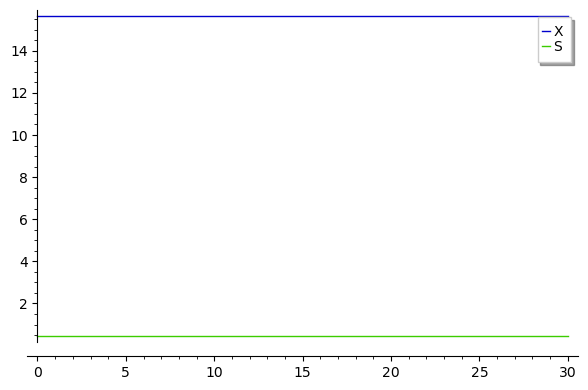

In [45]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 0.5),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 0.5)),(t,0,30), legend_label =["X","S"])

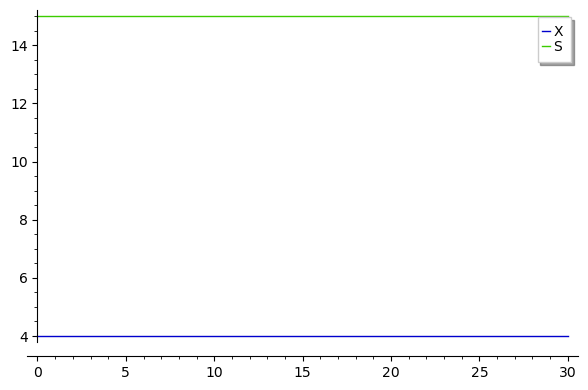

In [46]:
plot((solX(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.5),solS(mu_max = 1.6,K_s = 1.0,Y = 0.8,S_f = 20.0,D = 1.5)),(t,0,30), legend_label =["X","S"])

In [18]:
var('S X mu_max D Y S_f K_s')
Jack = jacobian([(mu_max*S/(K_s+S))*X-D*X, D*S_f-D*S-((mu_max*S/(K_s+S))*X/Y)], [X,S])
Jack

[                                 -D + S*mu_max/(K_s + S)              X*mu_max/(K_s + S) - S*X*mu_max/(K_s + S)^2]
[                                 -S*mu_max/((K_s + S)*Y) -D - X*mu_max/((K_s + S)*Y) + S*X*mu_max/((K_s + S)^2*Y)]

In [19]:
Jack.trace()

-2*D + S*mu_max/(K_s + S) - X*mu_max/((K_s + S)*Y) + S*X*mu_max/((K_s + S)^2*Y)

In [20]:
Jack.det()

(D - S*mu_max/(K_s + S))*(D + X*mu_max/((K_s + S)*Y) - S*X*mu_max/((K_s + S)^2*Y)) + S*(X*mu_max/(K_s + S) - S*X*mu_max/(K_s + S)^2)*mu_max/((K_s + S)*Y)

In [21]:
Jack.eigenvectors_right()

[((S^2*Y*mu_max - (K_s^2*Y + 2*K_s*S*Y + S^2*Y)*D + (S*Y*mu_max - X*mu_max)*K_s)/(K_s^2*Y + 2*K_s*S*Y + S^2*Y),
  [(1, -1/Y)],
  1),
 (-D, [(1, -(K_s*S + S^2)/(K_s*X))], 1)]

In [22]:
Jack.eigenvalues()

[(S^2*Y*mu_max - (K_s^2*Y + 2*K_s*S*Y + S^2*Y)*D + (S*Y*mu_max - X*mu_max)*K_s)/(K_s^2*Y + 2*K_s*S*Y + S^2*Y),
 -D]

In [23]:
Jack.characteristic_polynomial()

x^2 + (2*D - S*mu_max/(K_s + S) - S*X*mu_max/((K_s^2 + 2*K_s*S + S^2)*Y) + X*mu_max/((K_s + S)*Y))*x + D^2 - D*S*mu_max/(K_s + S) - D*S*X*mu_max/((K_s^2 + 2*K_s*S + S^2)*Y) + D*X*mu_max/((K_s + S)*Y)

In [24]:
Jack.characteristic_polynomial().roots()

[(-((D*K_s^2 + 2*D*K_s*S + D*S^2)*Y + (K_s*X - (K_s*S + S^2)*Y)*mu_max)/((K_s^2 + 2*K_s*S + S^2)*Y),
  1),
 (-D, 1)]

In [25]:
Jack.jordan_form()

[(S^2*Y*mu_max - (K_s^2*Y + 2*K_s*S*Y + S^2*Y)*D + (S*Y*mu_max - X*mu_max)*K_s)/(K_s^2*Y + 2*K_s*S*Y + S^2*Y)|                                                                                                           0]
[------------------------------------------------------------------------------------------------------------+------------------------------------------------------------------------------------------------------------]
[                                                                                                           0|                                                                                                          -D]

Estabilidade do equilíbrio

In [26]:
var('t mum_max S K_s D X0')
X=function('X')(t)
dxdt = diff(X,t)== (mu_max*S/(K_s+S))*X-D*X
sol = desolve(dxdt,X,ivar=t, ics=[0,X0])
show(sol)

X0*e^(-D*K_s*t/(K_s + S) - D*S*t/(K_s + S) + S*mu_max*t/(K_s + S))

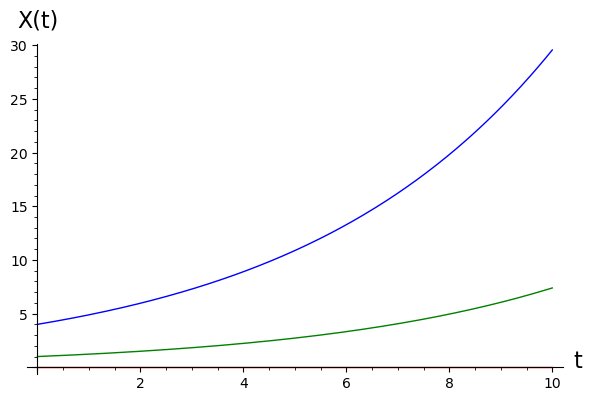

In [27]:
f(t) = sol(mu_max=1.6, S=3, D=1.0, K_s=1.0,X0=4)
g(t) = sol(mu_max=1.6, S=3, D=1.0, K_s=1.0,X0=0)
h(t) = sol(mu_max=1.6, S=3, D=1.0, K_s=1.0,X0=1)
(plot(f, 0,10,axes_labels=['t','X(t)']) + plot(g, 0,10,axes_labels=['t','X(t)'], color='red') +\
 plot(h, 0,10,axes_labels=['t','X(t)'], color='green'))

In [29]:
solve((mu_max*S/(K_s+S))*X-D*X,X)

[X(t) == 0]

In [30]:
var('t mum_max D_f S Y K_s X D S0')
assume(X^2*mu_max^2+(2*D*K_s>0))
assumptions()
S=function('S')(t)
dsdt = diff(S,t)== D*S_f-D*S-((mu_max*S/(K_s+S))*X/Y)
sol = desolve(dsdt,S,ivar=t, ics=[0,S0])
show(sol)

TypeError: Computation failed since Maxima requested additional constraints; using the 'assume' command before evaluation *may* help (example of legal syntax is 'assume(X^2*mu_max^2+(2*D*K_s
>0)', see `assume?` for more details)
Is X^2*mu_max^2+(2*D*K_s
                                    -2*D*S_f)
                                    *X*Y*mu_max
                                   +(D^2*S_f^2
                                    +2*D^2*K_s
                                      *S_f
                                    +D^2*K_s^2)
                                    *Y^2 positive or negative?

In [31]:
def model_equilibrium(t, y, params):
    X, S = y
    D, Sf, Y, mumax, Ks = params
    return [
        (mumax*S/(Ks+S))*X - D*X, #dX/dt
        D*Sf - D*S -((mumax*S/(Ks+S))*X/Y) # dS/dt
    ]

In [32]:
mumax = 1.6   
Ks = 1.00     
Y = 0.8     
Sf = 20.0    
D = 1.00
#mu = mumax*S/(Ks+S)

Equilíbrio 1:

In [33]:
T = ode_solver()
T.function = model_equilibrium
T.algorithm='rk8pd'
inits = [0.0, 20.0]
tspan = [0,100]
T.ode_solve(tspan, inits, num_points=500, params=[D, Sf, Y, mumax, Ks])

In [34]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[ 0., 20.],
       [ 0., 20.],
       [ 0., 20.],
       ...,
       [ 0., 20.],
       [ 0., 20.],
       [ 0., 20.]])

In [35]:
var('mu D Sf X S mumax Ks')

mu==mumax*S/(Ks + S)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,0,0], ivar=t)
show(sol)

[X(t) == 0, S(t) == -Sf*e^(-D*t) + Sf]

In [36]:
var('mu D Sf X S mumax Ks')

mu=mumax*S/(Ks + S)

X = function('X')(t)
S = function('S')(t)
de1 = diff(X,t) == mu*X - D*X
de2 = diff(S,t) == D*Sf - D*S -(mu*X/Y)
sol = desolve_system([de1,de2],[X,S],ics=[0,0,0], ivar=t)
show(sol)

[X(t) == 0, S(t) == -Sf*e^(-D*t) + Sf]